# ПРОЕКТ
# Построение модели оттока клиентов для "Бета-Банка"

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Описание проекта

На основании исторических данных о поведении клиентов и расторжении договоров с «Бета-Банком» необходимо спрогнозировать: уйдёт клиент из банка в ближайшее время или нет.

Необходимо решить задачу класификации и построить модель обучения с учителем.

Критерий успешности модели, определенный заказчиком,- предельно большое значение **F1-меры** на тестовой выборке, не менее **0.59**.

Проект будет выполнен в **4** шага:
- подготовка данных имеющегося датасета;
- исследование вариантов моделей;
- устранение дисбаланса классов;
- тестирование лучшей модели.

## Подготовка данных

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.utils import shuffle

from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [ ]:
df = pd.read_csv('/datasets/Churn.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Датасет содержит 10 000 срок и 13 столбщов, 12 из которых не содержат пропусков. Пропуски в столбце **"Tenure"** (сколько лет человек является клиентом банка) составляют **9%,** что не позволяет удалить строки с пропусками из датасета. Кроме того, необходимо будет проверить корректность типов данных по ряду столбцов.

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [ ]:
df.tail(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3.0,35016.60,1,1,0,53667.08,0
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4.0,88381.21,1,1,0,69384.71,1
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2.0,0.00,1,1,0,195192.40,0
9993,9994,15569266,Rahman,644,France,Male,28,7.0,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2.0,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,NaN,130142.79,1,1,0,38190.78,0


Сразу можно отметить:

- необходимо скорректировать названия столбцов (нижний регистр, "змеиный" стиль);
- столбец "RowNumber", по сути, дублирует индекс датасета;
- столбец "Surname","CustomerId" не несут дополнительной информации;
- столбец "Geography", "Gender" необходимо будет преобразовать.

In [ ]:
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.007322,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.021418,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,-0.000062,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.013134,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.007322,-0.021418,-0.000062,-0.013134,1.000000,-0.007911,0.011979,0.027232,-0.032178,0.010520,-0.016761
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.007911,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.011979,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.027232,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.032178,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.010520,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


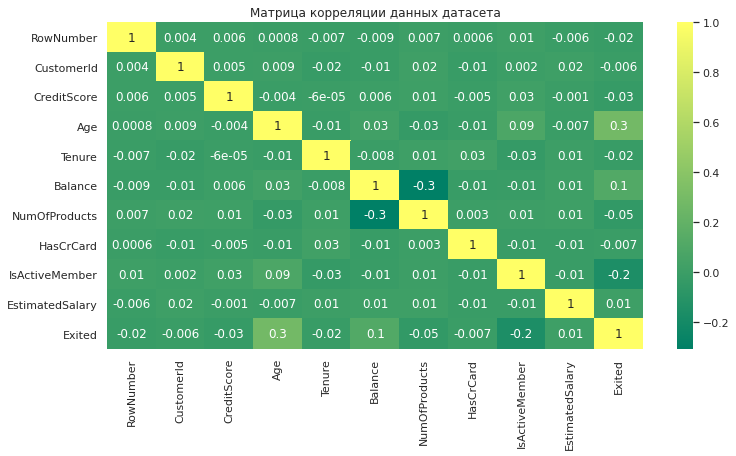

In [ ]:
sns.set(rc = {'figure.figsize':(12,6)})
sns.heatmap(df.corr(), annot = True, fmt='.1g',  cmap='summer')
plt.title("Матрица корреляции данных датасета")
plt.show()

По анализу корреляции данных датасета можно сделать вывод об отсутствии (или крайне низкой) корреляции между данными столбцов датасета. Следовательно, по критерию корреляции, все столбцы необходимо сохранить.

In [ ]:
df.duplicated().sum()

0

Датасет не содержит явных полных дубликатов строк.

In [ ]:
df = df.drop(['RowNumber','Surname', 'CustomerId'], axis=1)
df.columns = df.columns.str.lower()
df = df.rename(columns={'creditscore':'credit_score', 'numofproducts':'num_of_products',
                        'hascrcard':'has_cr_card', 'isactivemember':'is_active', 'estimatedsalary':'estimated_salary'})

In [ ]:
df_nul_tenure=df.loc[df['tenure'].isna()]
df_nul_tenure.head(10)

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active,estimated_salary,exited
30,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
82,543,France,Female,36,NaN,0.00,2,0,0,26019.59,0
85,652,Spain,Female,75,NaN,0.00,2,1,1,114675.75,0
94,730,Spain,Male,42,NaN,0.00,2,0,1,85982.47,0
99,413,France,Male,34,NaN,0.00,2,0,0,6534.18,0
111,538,Germany,Male,39,NaN,108055.10,2,1,0,27231.26,0


Явной зависимости наличия пропусков в столбце "tenure"с другими данными датасета не прослеживается.
Вычислим медиану значений столбца "tenure" отдельно для ушедших и оставшихся клиентов.

In [ ]:
df1=df.query('exited==0 and tenure.isna()==False')['tenure'].median()
df2=df.query('exited==1 and tenure.isna()==False')['tenure'].median()

print(df1)
print(df2)

df['tenure']=df['tenure'].fillna(5)

print(df['tenure'].isna().sum())
df['tenure'] = df['tenure'].astype(int)

5.0
5.0
0


Так как значение медианы для двух типов кл иентов совпало - заполнилним пропуски в столбце "tenure" медианным значением.

В столбце "gender" изменим название на "is_male" в соответсвии с логикой замены значений.

In [ ]:
df.loc[(df['gender'] == 'Male'), 'gender'] = 1
df.loc[(df['gender'] == 'Female'), 'gender'] = 0

df = df.rename(columns={'gender':'is_male'})
df['is_male']=df['is_male'].astype(int)

Преобразуем категориальные признаки столбца "geography" в численные техникой прямого кодирования (OHE), избегая дамми-ловушку.

In [ ]:
df=pd.get_dummies(df, drop_first=True)
df.columns = df.columns.str.lower()
df[['geography_germany','geography_spain']] = df[['geography_germany','geography_spain']].astype(int)

Как результат - получили датасет без пропусков и дубликатов, содержаций только численные значения.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_score       10000 non-null  int64  
 1   is_male            10000 non-null  int64  
 2   age                10000 non-null  int64  
 3   tenure             10000 non-null  int64  
 4   balance            10000 non-null  float64
 5   num_of_products    10000 non-null  int64  
 6   has_cr_card        10000 non-null  int64  
 7   is_active          10000 non-null  int64  
 8   estimated_salary   10000 non-null  float64
 9   exited             10000 non-null  int64  
 10  geography_germany  10000 non-null  int64  
 11  geography_spain    10000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 937.6 KB


In [ ]:
df.head()

,credit_score,is_male,age,tenure,balance,num_of_products,has_cr_card,is_active,estimated_salary,exited,geography_germany,geography_spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


**Вывод по разделу:**

В имеющемся датасете размерностью 10 000 срок и 13 столбцов в результате подготовки данных произведено:

- заполнение пропусков столбца "tenure' медианным значением;
- преобразование типов данных в результате чего все столбы имеют численный тип данных;
- исключение избыточных столбцов данных.

Итоговый датасет содержит 10 000 строк, 11 столбцов, не содержит пропусков, дубликатов строк и зависимых между собой столбцов.

Данные готовы для построения на них моделей машинного обучения.

## Исследование задачи

Сформируем признаки и целевой признак.

Разделим выборку на три составляющих: обучающую, валидационную и тестовую. Данные для выборок сформируем в соотношении 3:1:1. Разделение проведем в 2 этапа, сначала выделив обучающие выборки, а потом валидационные и тестовые.

Построим и найдем лучшие гиперпараметры для моделей:

- Решающее дерево
- Случайный лес
- Логическая регрессия.

In [ ]:
pd.options.mode.chained_assignment = None


features = df.drop(['exited'], axis=1)
target = df['exited']

features_train, features_temp, target_train, target_temp = \
          train_test_split(features, target, test_size=0.4, random_state=12345)

features_test, features_valid, target_test, target_valid = \
         train_test_split(features_temp, target_temp, test_size=0.5, random_state=12345)

scaler = StandardScaler()
num_columns = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']
scaler.fit(features_train[num_columns])
features_train[num_columns] = scaler.transform(features_train[num_columns])
features_valid[num_columns] = scaler.transform(features_valid[num_columns])
features_test[num_columns] = scaler.transform(features_test[num_columns])

print(features_train.shape, features_test.shape, features_valid.shape)
print(target_train.shape, target_test.shape, target_valid.shape)

(6000, 11) (2000, 11) (2000, 11)
(6000,) (2000,) (2000,)


**Модель Решающее дерево**

In [ ]:
best_model = None
best_depth = 0
best_result = 0
best_roc_auc = 0

for depth in range(1, 8):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    result_valid = f1_score(target_valid, predictions_valid)

    if result_valid > best_result:
        best_model = model
        best_depth = depth
        best_result = result_valid
        best_roc_auc = roc_auc_score(target_valid, model.predict_proba(features_valid)[:,1])

print("Глубина дерева лучшей модели:", best_depth)
print("F1 лучшей модели", best_result.round(4), "AUC-ROC лучшей модели", best_roc_auc.round(4))

Глубина дерева лучшей модели: 6
F1 лучшей модели 0.5262 AUC-ROC лучшей модели 0.8363


**Модель Случайный лес**

In [ ]:
best_model = None
best_depth = 0
best_est = 0
best_result = 0
best_roc_auc = 0

for est in range(1, 13):
    for depth in range (1, 19):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
        predictions_valid = model.predict(features_valid)
        result_valid = f1_score(target_valid, predictions_valid)

        if result_valid > best_result:
            best_model = model
            best_depth = depth
            best_est = est
            best_result = result_valid
            best_roc_auc = roc_auc_score(target_valid, model.predict_proba(features_valid)[:,1])


print("Лучшая модель: Глубина дерева:", best_depth, "Количество деревьев:", best_est)
print("F1 лучшей модели", best_result.round(4), "AUC-ROC лучшей модели", best_roc_auc.round(4))

Лучшая модель: Глубина дерева: 17 Количество деревьев: 11
F1 лучшей модели 0.5538 AUC-ROC лучшей модели 0.8259


**Модель Логическая регрессия**

In [ ]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)

result_valid = f1_score(target_valid, predictions_valid)
roc_auc_valid = roc_auc_score(target_valid, model.predict_proba(features_valid)[:,1])

print("F1 модели", result_valid.round(4), "AUC-ROC модели", roc_auc_valid.round(4))

F1 модели 0.2748 AUC-ROC модели 0.7386


**Вывод по разделу:**

Из данных моделей лучшее значение F1-меры показала модель **Случайный лес** с гиперпараметрами: количество деревьев = 11, глубина дерева = 17. **F1-мера** данной модели = **0.55**. Данный показатель ниже минимально допустимого, определенного заказчиком (0.59).

Необходимо дальнейшее увовершенствование модели.

## Борьба с дисбалансом

Проведем анализ класоов и определим наличие (отсутствие) дисбаланса и, при наличии, существующую расбалансированность классов в данных.

In [ ]:
print(target_train.value_counts())
print(target_valid.value_counts())
print(target_test.value_counts())

0    4804
1    1196
Name: exited, dtype: int64
0    1577
1     423
Name: exited, dtype: int64
0    1582
1     418
Name: exited, dtype: int64


Налицо дисбаланс классов: отрицательных ответов более, чем в 4 раза больше, чем положительных. На лучшей подели из раздела "Исследование задачи", проверим различные варианты устранения дисбаланса классов.

**Метод балансировки весов классов (Взвешивание классов)**

In [ ]:
best_model = None
best_depth = 0
best_est = 0
best_result = 0
best_roc_auc = 0

for est in range(1, 18):
    for depth in range (1, 9):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight='balanced')
        model.fit(features_train, target_train)
        predictions_valid = model.predict(features_valid)
        result_valid = f1_score(target_valid, predictions_valid)

        if result_valid > best_result:
            best_model = model
            best_depth = depth
            best_est = est
            best_result = result_valid
            best_roc_auc = roc_auc_score(target_valid, model.predict_proba(features_valid)[:,1])

print("Лучшая модель: Глубина дерева:", best_depth, "Количество деревьев:", best_est)
print("F1 лучшей модели", best_result.round(4), "AUC-ROC лучшей модели", best_roc_auc.round(4))

Лучшая модель: Глубина дерева: 7 Количество деревьев: 16
F1 лучшей модели 0.6151 AUC-ROC лучшей модели 0.8449


Метрика F1 c примением метода взвешивания классов существенно улучшилась и уже выше требуемого минимального значения (0,59).

Тем не менее, проверим остальные методы устранения дисбаланса классов.

**Метод увеличения выборки положительных ответов**

In [ ]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)

    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

best_model = None
best_depth = 0
best_est = 0
best_result = 0
best_roc_auc = 0

for est in range(1, 20):
    for depth in range (1, 12):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_upsampled, target_upsampled)
        predictions_valid = model.predict(features_valid)
        result_valid = f1_score(target_valid, predictions_valid)

        if result_valid > best_result:
            best_model = model
            best_depth = depth
            best_est = est
            best_result = result_valid
            best_roc_auc = roc_auc_score(target_valid, model.predict_proba(features_valid)[:,1])

print("Лучшая модель: Глубина дерева:", best_depth, "Количество деревьев:", best_est)
print("F1 лучшей модели", best_result.round(4), "AUC-ROC лучшей модели", best_roc_auc.round(4))

Лучшая модель: Глубина дерева: 10 Количество деревьев: 18
F1 лучшей модели 0.6132 AUC-ROC лучшей модели 0.849


Значение метрики F1-мера ухудшилось. Данная модель не подходит.

**Метод уменьшения выборки отрицательных ответов**

In [ ]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)

    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

best_model = None
best_depth = 0
best_est = 0
best_result = 0
best_roc_auc = 0

for est in range(1, 11):
    for depth in range (1, 7):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_downsampled, target_downsampled)
        predictions_valid = model.predict(features_valid)
        result_valid = f1_score(target_valid, predictions_valid)

        if result_valid > best_result:
            best_model = model
            best_depth = depth
            best_est = est
            best_result = result_valid
            best_roc_auc = roc_auc_score(target_valid, model.predict_proba(features_valid)[:,1])

print("Лучшая модель: Глубина дерева:", best_depth, "Количество деревьев:", best_est)
print("F1 лучшей модели", best_result.round(4), "AUC-ROC лучшей модели", best_roc_auc.round(4))

Лучшая модель: Глубина дерева: 5 Количество деревьев: 9
F1 лучшей модели 0.5762 AUC-ROC лучшей модели 0.8285


Значение метрики F1-мера ухудшилось. Данная модель не подходит.

**Вывод по разделу:**

В результате построения лучшей модели из предыдущего раздела установлено, что лучшие результаты показывает метод балансировки весов классов, для которого **F1-мера = 0.615**.

## Тестирование модели

Проверим модель на тестовых выборках.

**Модель случайный лес. Метод балансировки весов классов.**

In [ ]:
model = RandomForestClassifier(random_state=12345, n_estimators=16, max_depth=7, class_weight='balanced')
model.fit(features_train, target_train)
predictions_test = model.predict(features_test)
result_test = f1_score(target_test, predictions_test)
roc_auc_test = roc_auc_score(target_test, model.predict_proba(features_test)[:,1])

print("F1 лучшей модели", result_test.round(4), "AUC-ROC лучшей модели", roc_auc_test.round(4))

F1 лучшей модели 0.6135 AUC-ROC лучшей модели 0.8493


На тестовой выборке, выбранная ранее лучшая модель (Случайный лес) с подобранными гиперпараметрами и применением алгоритма устранения дисбаланса классов путем балансировки весов классов, значение **F1-меры = 0.6135**, что выше минимального требования заказчика (0,59)

**ОБЩИЙ вывод по проекту:**

В результате выполнения проекта был исследован датасет с историческими данными поведения клиентов "Бета-Банка" и расторжению договоров с ним и сформирована модель решения задачи классификации обучения с учителем.

Объем датасета 10 000 строк и 13 столбцов.

В процессе выполнения проекта проведена обработка данных датасета с устранением пропусков даннных, исключением избыточных стобцов, изменением типов данных.

Для применения алгоритмов машинного обучения выборка исходных данных состояла из 10 000 строк, не содержащих пропуски и 11 столбцов. Все данные приведены к численному формату и стандартизированы.

Были проанализированы три модели:

- Решающее дерево
- Случайный лес
- Логическая регрессия.

Критерий успешности модели определен заказчиком - F1-мера.

Лучшей моделью оказалась модель Случайный лес, которая на валидационной выборке показала значение F1-меры = 0.615, а на тестовой **0.613**. Оба показателя выше минимально требуемого заказчиком значения **0.59**, таким образом, **выбранная модель является успешной** и может применяться в "Бета-Банке" для прогнозирования возможного расторжения контракта существующими клиентами.

Дополнительно на всех моделях рассчитывался показатель AUC-ROC, который также оказался довольно высоким: 0.84 на валидационной и 0.85 на тестовой выборках.